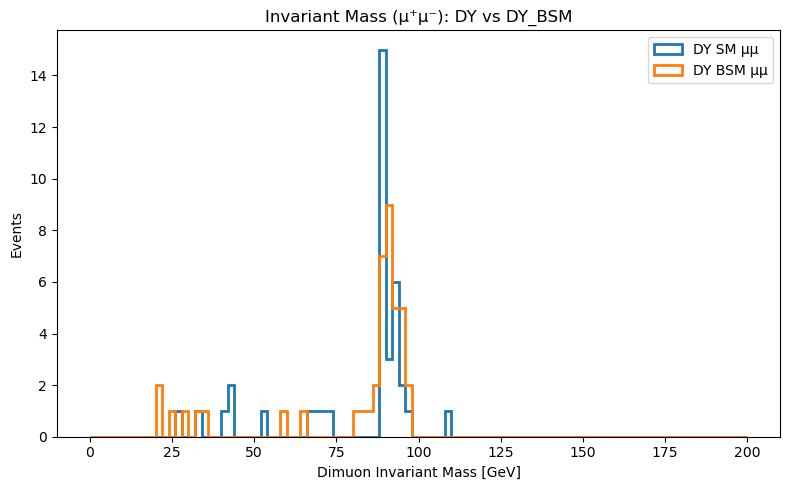

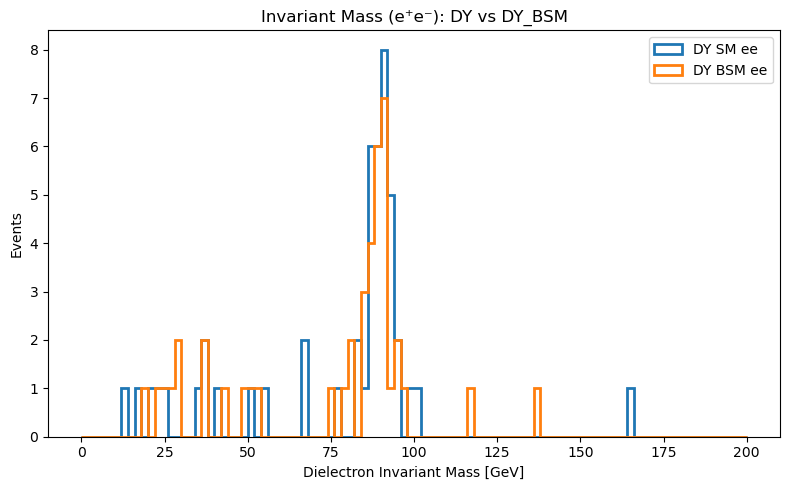

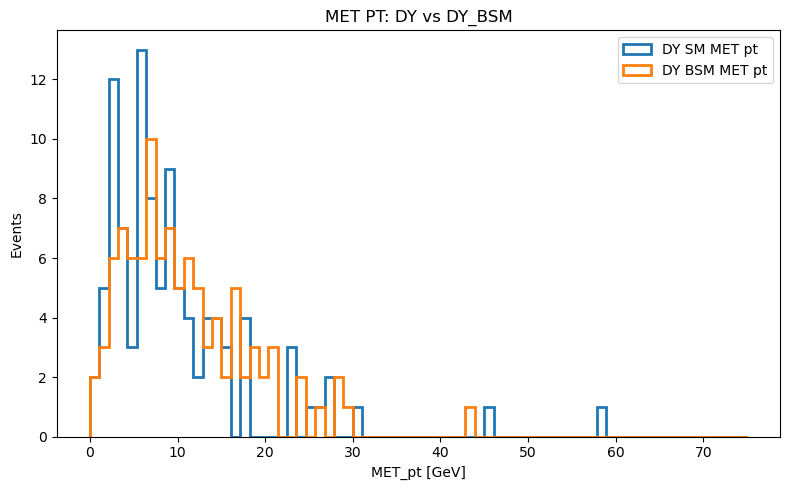

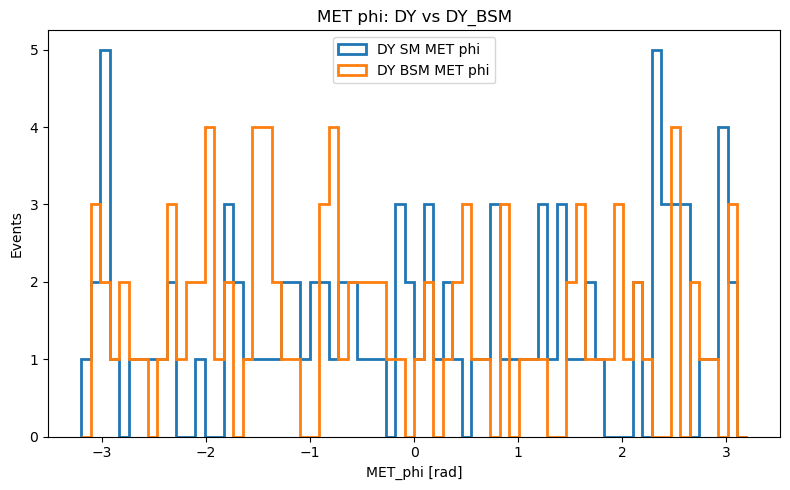

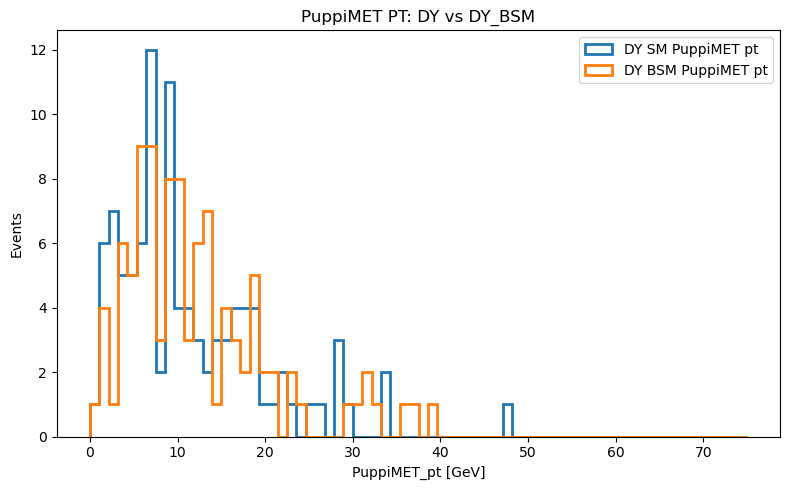

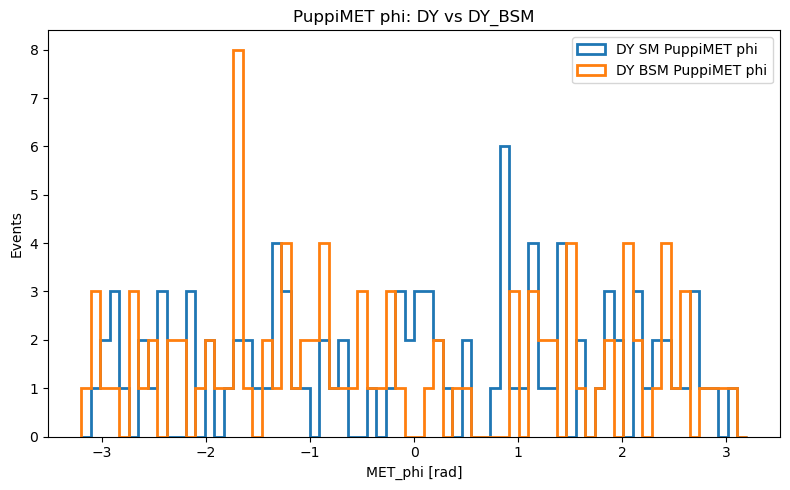

In [21]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

nano_dy = "/Users/jochoafl/cms10_sim/CMSSW_10_6_30/src/NanoAOD.root"
nano_bsm = "/Users/jochoafl/cms10_sim/bsm_dy_files/NanoAOD.root"

# Open trees
dy_tree = uproot.open(f"{nano_dy}:Events")
bsm_tree = uproot.open(f"{nano_bsm}:Events")

# ==== Invariant mass computation ====
def invariant_mass(pt1, eta1, phi1, m1, pt2, eta2, phi2, m2):
    def to_cartesian(pt, eta, phi, m):
        px = pt * np.cos(phi)
        py = pt * np.sin(phi)
        pz = pt * np.sinh(eta)
        e = np.sqrt(px**2 + py**2 + pz**2 + m**2)
        return px, py, pz, e
    px1, py1, pz1, e1 = to_cartesian(pt1, eta1, phi1, m1)
    px2, py2, pz2, e2 = to_cartesian(pt2, eta2, phi2, m2)
    return np.sqrt(np.maximum((e1 + e2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2, 0))

def get_dilepton_mass(tree, particle="Muon"):
    pt = tree[f"{particle}_pt"].array()
    eta = tree[f"{particle}_eta"].array()
    phi = tree[f"{particle}_phi"].array()
    mass = tree[f"{particle}_mass"].array()
    has_dilepton = ak.num(pt) >= 2
    return invariant_mass(
        pt[has_dilepton][:, 0], eta[has_dilepton][:, 0], phi[has_dilepton][:, 0], mass[has_dilepton][:, 0],
        pt[has_dilepton][:, 1], eta[has_dilepton][:, 1], phi[has_dilepton][:, 1], mass[has_dilepton][:, 1]
    )

# ==== MET  ====
def get_met(tree):
    return tree["MET_pt"].array(), tree["PuppiMET_pt"].array(), tree["MET_phi"].array(), tree["PuppiMET_phi"].array()


# ==== Process all ====
mass_dy_mu = get_dilepton_mass(dy_tree, "Muon")
mass_bsm_mu = get_dilepton_mass(bsm_tree, "Muon")
mass_dy_el = get_dilepton_mass(dy_tree, "Electron")
mass_bsm_el = get_dilepton_mass(bsm_tree, "Electron")

met_dy, puppimet_dy, met_phi, puppimet_phi= get_met(dy_tree)
met_bsm, puppimet_bsm, met_bsm_phi, puppimet_bsm_phi = get_met(bsm_tree)


# ==== Plotting ====

# 1. Invariant mass: Muons
plt.figure(figsize=(8, 5))
plt.hist(mass_dy_mu, bins=100, range=(0,200), histtype='step', label="DY SM μμ", linewidth=2)
plt.hist(mass_bsm_mu, bins=100, range=(0,200), histtype='step', label="DY BSM μμ", linewidth=2)
plt.xlabel("Dimuon Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass (μ⁺μ⁻): DY vs DY_BSM")
plt.legend(); plt.grid(False); plt.tight_layout()

# 2. Invariant mass: Electrons
plt.figure(figsize=(8, 5))
plt.hist(mass_dy_el, bins=100, range=(0,200), histtype='step', label="DY SM ee", linewidth=2)
plt.hist(mass_bsm_el, bins=100, range=(0,200), histtype='step', label="DY BSM ee", linewidth=2)
plt.xlabel("Dielectron Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass (e⁺e⁻): DY vs DY_BSM")
plt.legend(); plt.grid(False); plt.tight_layout()

# 3. MET PT
plt.figure(figsize=(8, 5))
plt.hist(met_dy, bins=70, range=(0,75), histtype='step', label="DY SM MET pt", linewidth=2)
plt.hist(met_bsm, bins=70, range=(0,75), histtype='step', label="DY BSM MET pt", linewidth=2)
plt.xlabel("MET_pt [GeV]")
plt.ylabel("Events")
plt.title("MET PT: DY vs DY_BSM")
plt.legend(); plt.grid(False); plt.tight_layout()

# 4. MET phi
plt.figure(figsize=(8, 5))
plt.hist(met_phi, bins=70, range=(-3.2,3.2), histtype='step', label="DY SM MET phi", linewidth=2)
plt.hist(met_bsm_phi, bins=70, range=(-3.2,3.2), histtype='step', label="DY BSM MET phi", linewidth=2)
plt.xlabel("MET_phi [rad]")
plt.ylabel("Events")
plt.title("MET phi: DY vs DY_BSM")
plt.legend(); plt.grid(False); plt.tight_layout()


# 4. PuppiMET PT
plt.figure(figsize=(8, 5))
plt.hist(puppimet_dy, bins=70, range=(0,75), histtype='step', label="DY SM PuppiMET pt", linewidth=2)
plt.hist(puppimet_bsm, bins=70, range=(0,75), histtype='step', label="DY BSM PuppiMET pt", linewidth=2)
plt.xlabel("PuppiMET_pt [GeV]")
plt.ylabel("Events")
plt.title("PuppiMET PT: DY vs DY_BSM")
plt.legend(); plt.grid(False); plt.tight_layout()

# 5. PuppiMET phi
plt.figure(figsize=(8, 5))
plt.hist(puppimet_phi, bins=70, range=(-3.2,3.2), histtype='step', label="DY SM PuppiMET phi", linewidth=2)
plt.hist(puppimet_bsm_phi, bins=70, range=(-3.2,3.2), histtype='step', label="DY BSM PuppiMET phi", linewidth=2)
plt.xlabel("MET_phi [rad]")
plt.ylabel("Events")
plt.title("PuppiMET phi: DY vs DY_BSM")
plt.legend(); plt.grid(False); plt.tight_layout()


plt.show()
